# Detection and Classification of bone fracture Based on Machine Learning Techniques

### Methodology 
1. Preprocessing
    - **Median** Filter & **Gaussian** Filter for removing salt and pepper noise
    - **Histogram equalization** used for Brightness, Darkness and Contrast Noise  
2. Feature Extraction 
3. ML Algorithms
4. Result & Accuracy 


# Preprocessing

### 1.1 Median & Gaussian Filter

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../images/sample1.jpg', 0)

median = cv2.medianBlur(img, 3)
gauss = cv2.GaussianBlur(img, (3, 3), 0)

fg, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), dpi=120)
ax[2].set_title("Gaussian Filter")
ax[2].imshow(gauss, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Median Filter")
ax[1].imshow(median, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

### 1.2 Apply Histogram Equalization
[reference](https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2)

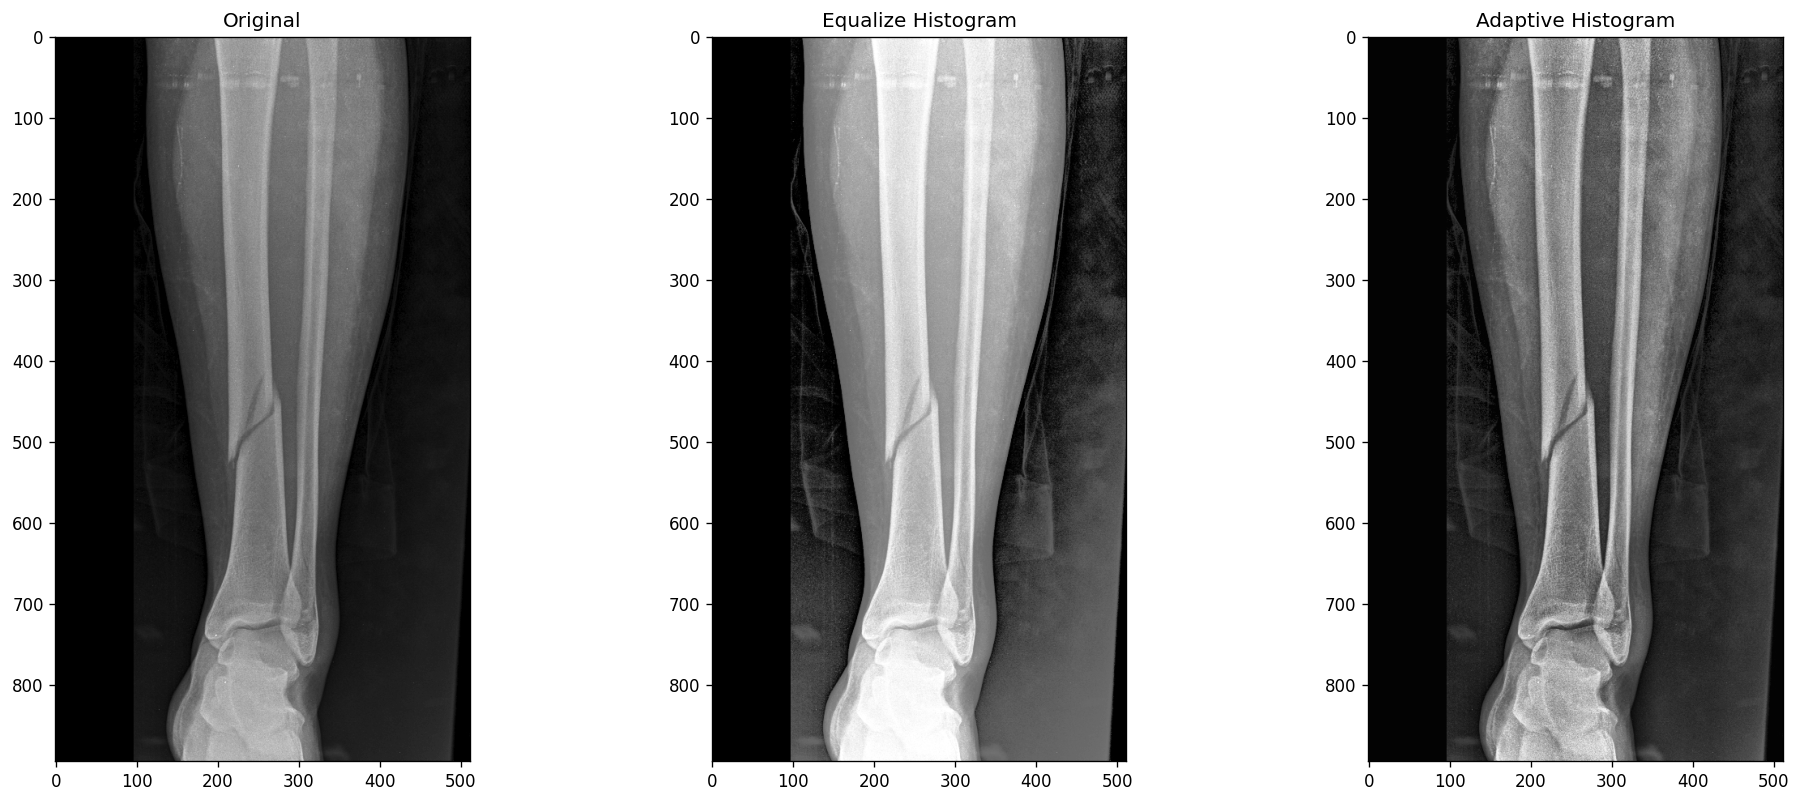

In [6]:
# Histogram Equalization
equalize_hist = cv2.equalizeHist(img)
# Contrastive Limited Adaptive Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_hist = clahe.apply(img)

fge, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), dpi=120)
ax[2].set_title("Adaptive Histogram")
ax[2].imshow(adaptive_hist, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Equalize Histogram")
ax[1].imshow(equalize_hist, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)


### 1.3 Bright and Contrast Adjustment

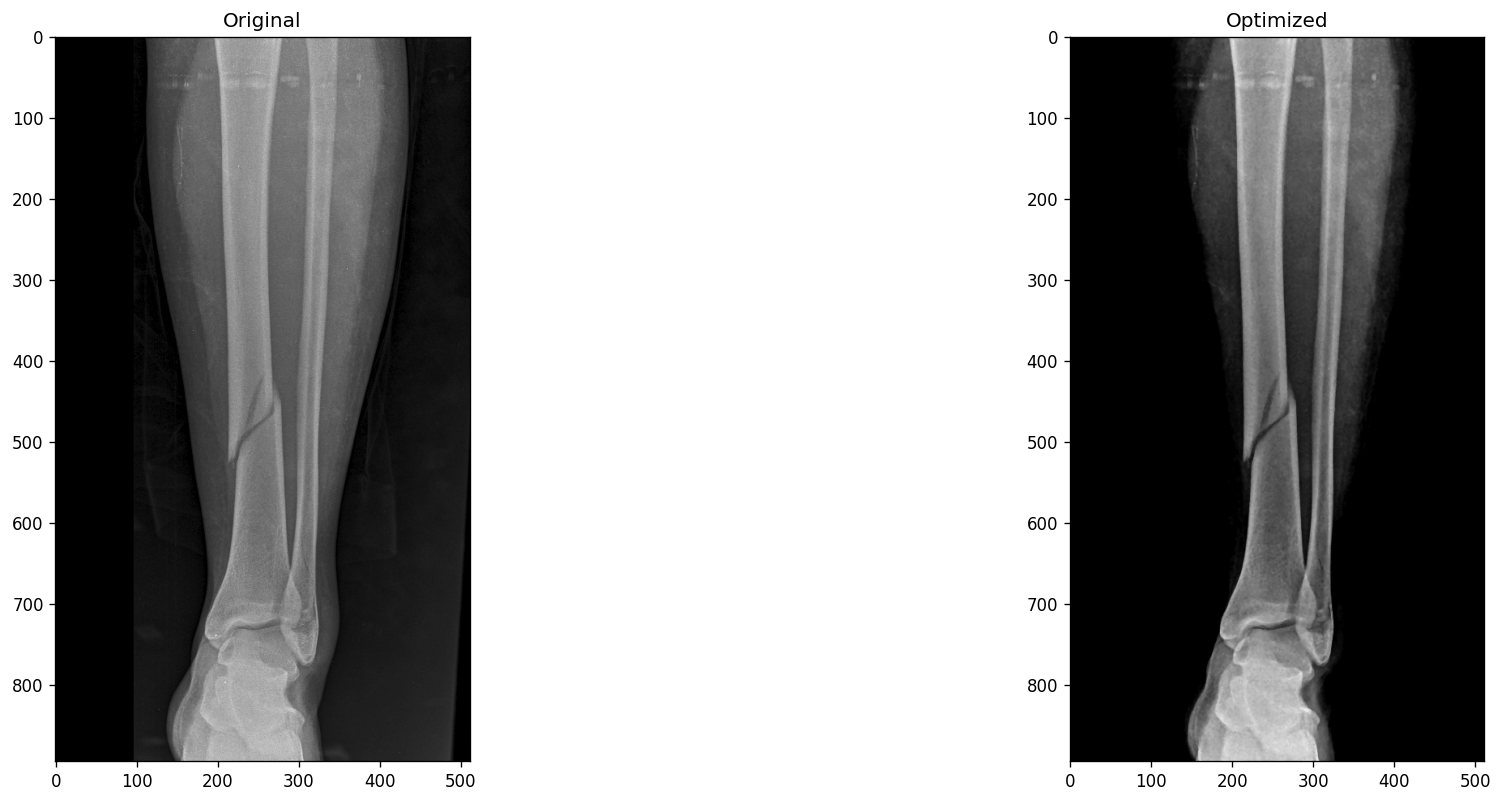

In [7]:
def apply_brightness_contrast(input_img, brightness=0, contrast=0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf


# img = cv2.imread("images/sample1.jpg", 0)
optimized_img = apply_brightness_contrast(median, brightness=-20, contrast=40)

fgo, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=120)
ax[1].set_title("Optimized")
ax[1].imshow(optimized_img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

# 2. Feature Extraction
### 2.1 Edge Detection

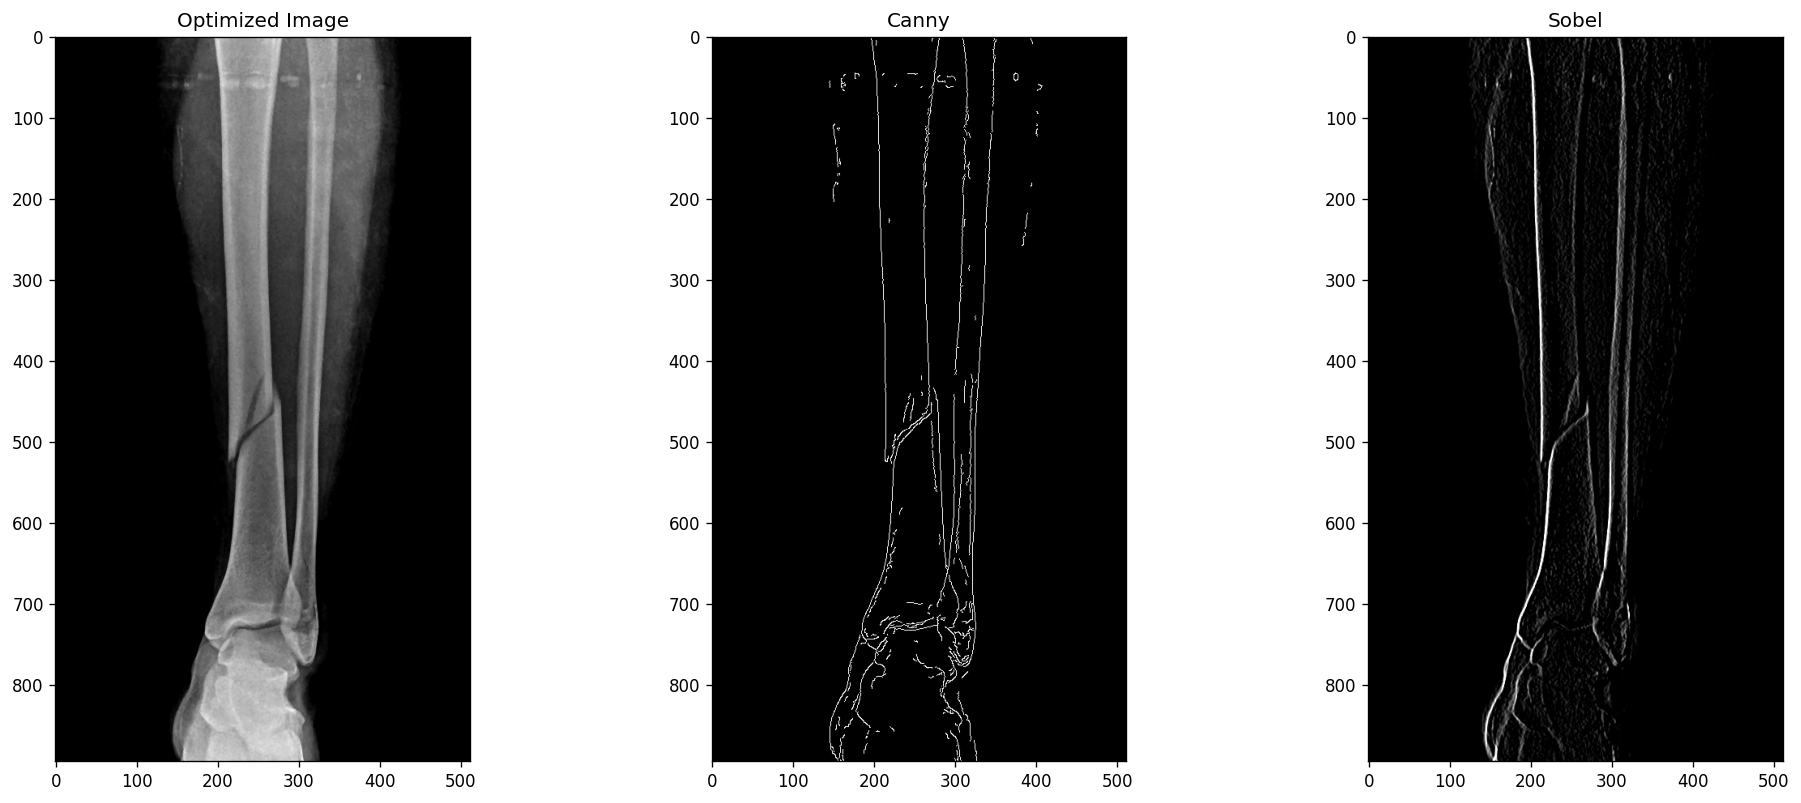

In [8]:
canny = cv2.Canny(optimized_img, 100, 150)
sobel = cv2.Sobel(optimized_img, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=3)

fgc, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), dpi=120)
ax[2].set_title("Sobel")
ax[2].imshow(sobel, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Canny")
ax[1].imshow(canny, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Optimized Image")
ax[0].imshow(optimized_img, cmap='gray', vmin=0, vmax=255)

### 2.2 Gray-Level Co-occurrence Matrix(GLCM)

In [12]:
from glcm import GLCM
import pandas as pd
from skimage.feature import graycomatrix, graycoprops


###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file

        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.

        img = dataset[image, :, :]
        ################################################################
        #START ADDING DATA TO THE DATAFRAME

        GLCM = graycomatrix(img, [1], [0])
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        GLCM2 = graycomatrix(img, [3], [0])
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [0], [np.pi / 4])
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4

        GLCM5 = graycomatrix(img, [0], [np.pi / 2])
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5

        #Append features from current image to the dataset
        image_dataset = pd.concat(
            [image_dataset, df])  #image_dataset.append(df)

    return image_dataset


####################################################################

# image_features = feature_extractor(np.array([canny]))
feat = GLCM(np.array(canny)).glcm_all()

print(len(feat))

48


# 3. All Together with ML

## 3.1 Define Preprocessors

In [1]:
from preprocessors import Filter
from bone_fracture import FractureDetector, Ml, DatasetType
from print import print_table

filters = [
    [Filter.median, Filter.equalize_hist, Filter.canny],
    [Filter.median, Filter.adaptive_hist, Filter.canny],
    [Filter.median, Filter.adjust_contrast, Filter.canny],
    [Filter.median, Filter.equalize_hist, Filter.sobel],
    [Filter.median, Filter.adaptive_hist, Filter.sobel],
    [Filter.median, Filter.adjust_contrast, Filter.sobel],
    [Filter.gaussian, Filter.equalize_hist, Filter.canny],
    [Filter.gaussian, Filter.adaptive_hist, Filter.canny],
    [Filter.gaussian, Filter.adjust_contrast, Filter.canny],
    [Filter.gaussian, Filter.equalize_hist, Filter.sobel],
    [Filter.gaussian, Filter.adaptive_hist, Filter.sobel],
    [Filter.gaussian, Filter.adjust_contrast, Filter.sobel],
]

## 3.2 SVM Algorithm

In [2]:
svm_data = []
for _filter in filters:
    detector = FractureDetector(_filter, Ml.svm, dataset=DatasetType.edited)
    svm_data.append(detector.accuracy())

print("SVM Comparison Table")
print_table(svm_data)


SVM Comparison Table
╒══════════╤═════════════════╤═════════════════╤════════════════╤════════════╕
│ Noise    │ Contrast        │ Edge Detector   │ ML Algorithm   │   Accuracy │
╞══════════╪═════════════════╪═════════════════╪════════════════╪════════════╡
│ Median   │ Equalize Hist   │ Canny           │ Svm            │   0.797297 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Canny           │ Svm            │   0.783784 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adjust Contrast │ Canny           │ Svm            │   0.810811 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Equalize Hist   │ Sobel           │ Svm            │   0.662162 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Sobel           │ Svm            │   0.77027  │
├──────────┼─────────────────┼─

## 3.3 Decision Tree Algorithm

In [3]:
dt_data = []
for _filter in filters:
    detector = FractureDetector(_filter, Ml.decision_tree,
                                dataset=DatasetType.edited)
    dt_data.append(detector.accuracy())

print("Decision Tree Comparison Table")
print_table(dt_data)

Decision Tree Comparison Table
╒══════════╤═════════════════╤═════════════════╤════════════════╤════════════╕
│ Noise    │ Contrast        │ Edge Detector   │ ML Algorithm   │   Accuracy │
╞══════════╪═════════════════╪═════════════════╪════════════════╪════════════╡
│ Median   │ Equalize Hist   │ Canny           │ Decision Tree  │   0.689189 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Canny           │ Decision Tree  │   0.743243 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adjust Contrast │ Canny           │ Decision Tree  │   0.743243 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Equalize Hist   │ Sobel           │ Decision Tree  │   0.743243 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Sobel           │ Decision Tree  │   0.648649 │
├──────────┼─────────

## 3.4 Naive Bayes Algorithm

In [4]:
nb_data = []
for _filter in filters:
    detector = FractureDetector(_filter, Ml.naive_bayes,
                                dataset=DatasetType.edited)
    nb_data.append(detector.accuracy())

print("Naive Bayes Comparison Table")
print_table(nb_data)

Naive Bayes Comparison Table
╒══════════╤═════════════════╤═════════════════╤════════════════╤════════════╕
│ Noise    │ Contrast        │ Edge Detector   │ ML Algorithm   │   Accuracy │
╞══════════╪═════════════════╪═════════════════╪════════════════╪════════════╡
│ Median   │ Equalize Hist   │ Canny           │ Naive Bayes    │   0.72973  │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Canny           │ Naive Bayes    │   0.648649 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adjust Contrast │ Canny           │ Naive Bayes    │   0.689189 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Equalize Hist   │ Sobel           │ Naive Bayes    │   0.743243 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Sobel           │ Naive Bayes    │   0.783784 │
├──────────┼───────────

## 3.5 Random Forest Algorithm

In [5]:
rf_data = []
for _filter in filters:
    detector = FractureDetector(_filter, Ml.random_forest,
                                dataset=DatasetType.edited)
    rf_data.append(detector.accuracy())

print("Random Forest Comparison Table")
print_table(rf_data)

Random Forest Comparison Table
╒══════════╤═════════════════╤═════════════════╤════════════════╤════════════╕
│ Noise    │ Contrast        │ Edge Detector   │ ML Algorithm   │   Accuracy │
╞══════════╪═════════════════╪═════════════════╪════════════════╪════════════╡
│ Median   │ Equalize Hist   │ Canny           │ Random Forest  │   0.72973  │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Canny           │ Random Forest  │   0.72973  │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adjust Contrast │ Canny           │ Random Forest  │   0.837838 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Equalize Hist   │ Sobel           │ Random Forest  │   0.878378 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Sobel           │ Random Forest  │   0.77027  │
├──────────┼─────────

## 3.6 Nearest Neighbors Algorithm

In [6]:
nn_data = []
for _filter in filters:
    detector = FractureDetector(_filter, Ml.nearest_neighbors,
                                dataset=DatasetType.edited)
    nn_data.append(detector.accuracy())

print("Nearest Neighbors Comparison Table")
print_table(nn_data)

Nearest Neighbors Comparison Table
╒══════════╤═════════════════╤═════════════════╤═══════════════════╤════════════╕
│ Noise    │ Contrast        │ Edge Detector   │ ML Algorithm      │   Accuracy │
╞══════════╪═════════════════╪═════════════════╪═══════════════════╪════════════╡
│ Median   │ Equalize Hist   │ Canny           │ Nearest Neighbors │   0.743243 │
├──────────┼─────────────────┼─────────────────┼───────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Canny           │ Nearest Neighbors │   0.72973  │
├──────────┼─────────────────┼─────────────────┼───────────────────┼────────────┤
│ Median   │ Adjust Contrast │ Canny           │ Nearest Neighbors │   0.743243 │
├──────────┼─────────────────┼─────────────────┼───────────────────┼────────────┤
│ Median   │ Equalize Hist   │ Sobel           │ Nearest Neighbors │   0.662162 │
├──────────┼─────────────────┼─────────────────┼───────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Sobel           │ Nearest Neighb

# 4 Data Augmentation

## 4.1 Generate Data

In [8]:
# import albumentations as A
# import cv2
#
#
# def visualize(image):
#     plt.figure(figsize=(10, 10))
#     plt.axis('off')
#     plt.imshow(image)
#
#
# image = cv2.imread('../images/sample1.jpg', 0)
# # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#
# transform = A.Compose(
#     [
#         # A.CLAHE(),
#         # A.VerticalFlip(p=1),
#         # A.HorizontalFlip(p=1),
#         # A.Transpose(),
#         A.ShiftScaleRotate(p=0.5, scale_limit=0.01)
#         # A.ShiftScaleRotate(shift_limit=0, scale_limit=0.6,
#         #                    rotate_limit=0, p=0.8),
#         # A.Blur(blur_limit=3),
#         # A.OpticalDistortion(),
#         # A.GridDistortion(),
#         # A.HueSaturationValue()
#     ])
#
# augmented_image = transform(image=image)['image']
# visualize(augmented_image)

from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
from PIL import Image
import os

datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

image_directory = '../images/edited2_images/non-fractured/'
SIZE = 254
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if image_name.split('.')[1] == 'jpg':
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)
i = 0
iterator = datagen.flow(x, batch_size=16,
                        save_to_dir=r'../images/augmented_images/non-fractured',
                        save_prefix='dr',
                        save_format='jpg')
for batch in iterator:
    i += 1
    if i > 100:
        break

## 4.2 Test Generated Data

In [5]:
from preprocessors import Filter
from bone_fracture import FractureDetector, Ml, DatasetType
from print import print_table

filters = [
    [Filter.median, Filter.equalize_hist, Filter.canny],
    [Filter.median, Filter.adaptive_hist, Filter.canny],
    [Filter.median, Filter.adjust_contrast, Filter.canny],
    [Filter.median, Filter.equalize_hist, Filter.sobel],
    [Filter.median, Filter.adaptive_hist, Filter.sobel],
    [Filter.median, Filter.adjust_contrast, Filter.sobel],
    [Filter.gaussian, Filter.equalize_hist, Filter.canny],
    [Filter.gaussian, Filter.adaptive_hist, Filter.canny],
    [Filter.gaussian, Filter.adjust_contrast, Filter.canny],
    [Filter.gaussian, Filter.equalize_hist, Filter.sobel],
    [Filter.gaussian, Filter.adaptive_hist, Filter.sobel],
    [Filter.gaussian, Filter.adjust_contrast, Filter.sobel],
]

nb_data = []
for _filter in filters:
    detector = FractureDetector(_filter, Ml.random_forest,
                                dataset=DatasetType.augmented)
    nb_data.append(detector.accuracy())

print("Naive Bayes Comparison Table")
print_table(nb_data)

Naive Bayes Comparison Table
╒══════════╤═════════════════╤═════════════════╤════════════════╤════════════╕
│ Noise    │ Contrast        │ Edge Detector   │ ML Algorithm   │   Accuracy │
╞══════════╪═════════════════╪═════════════════╪════════════════╪════════════╡
│ Median   │ Equalize Hist   │ Canny           │ Random Forest  │   0.62623  │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Canny           │ Random Forest  │   0.645902 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adjust Contrast │ Canny           │ Random Forest  │   0.580328 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Equalize Hist   │ Sobel           │ Random Forest  │   0.668852 │
├──────────┼─────────────────┼─────────────────┼────────────────┼────────────┤
│ Median   │ Adaptive Hist   │ Sobel           │ Random Forest  │   0.691803 │
├──────────┼───────────

# Experimental Tests

In [14]:
from preprocessors import Filter
from bone_fracture import FractureDetector, Ml
from print import print_table
import glob

filters = [
    # [Filter.median, Filter.equalize_hist, Filter.canny],
    # [Filter.median, Filter.adaptive_hist, Filter.canny],
    # [Filter.median, Filter.adjust_contrast, Filter.canny],
    # [Filter.median, Filter.equalize_hist, Filter.sobel],
    # [Filter.median, Filter.adaptive_hist, Filter.sobel],
    # [Filter.median, Filter.adjust_contrast, Filter.sobel],
    [Filter.gaussian, Filter.equalize_hist, Filter.canny],
    # [Filter.gaussian, Filter.adaptive_hist, Filter.canny],
    # [Filter.gaussian, Filter.adjust_contrast, Filter.canny],
    # [Filter.gaussian, Filter.equalize_hist, Filter.sobel],
    # [Filter.gaussian, Filter.adaptive_hist, Filter.sobel],
    # [Filter.gaussian, Filter.adjust_contrast, Filter.sobel],
]

for img_path in glob.glob('../images/test/fractured/*.jpg'):
    os.rename()
    printable_data = []
    for _filter in filters:
        detector = FractureDetector(_filter, Ml.random_forest)
        printable_data.append(detector.predict(img_path))

    print("Image: " + img_path.split('/')[-1])
    print_table(printable_data)

../images/augmented_train/non-fractured/11_24_2021-5_56_44 AM-348.jpg
../images/augmented_train/non-fractured/1.jpg
../images/augmented_train/non-fractured/11_14_2021-8_20_36 AM-663.jpg
../images/augmented_train/non-fractured/2.jpg
../images/augmented_train/non-fractured/11_23_2021-7_30_25 PM-824.jpg
../images/augmented_train/non-fractured/3.jpg
../images/augmented_train/non-fractured/11_24_2021-5_57_15 AM-273.jpg
../images/augmented_train/non-fractured/4.jpg
../images/augmented_train/non-fractured/11_17_2021-6_24_25 AM-81.jpg
../images/augmented_train/non-fractured/5.jpg
../images/augmented_train/non-fractured/12_7_2021-5_56_12 AM-989.jpg
../images/augmented_train/non-fractured/6.jpg
../images/augmented_train/non-fractured/11_11_2021-8_54_52 PM-633.jpg
../images/augmented_train/non-fractured/7.jpg
../images/augmented_train/non-fractured/11_20_2021-11_02_42 PM-5811.jpg
../images/augmented_train/non-fractured/8.jpg
../images/augmented_train/non-fractured/11_17_2021-6_23_56 AM-809.jpg
..